<center><img src='img/ms_logo.jpeg' height=40% width=40%></center>

<center><h1>Outlier Detection, Sample Size, and Confidence Intervals</h1></center>

When you're designing an experiment, numbers matter.  After all, we want out experiments to be statistically valid--otherwise, we're just guessing.  In this notebook, we'll learn a method for detecting outliers in our data set called "Tukey Fences", named after famed statistician John Tukey.  

Next, we'll learn about confidence inteverals, sample size, and the relationship between the two.  We'll learn how to calculate confidence intervals based on sample size, as well as how to determine the minimum sample size needed in order to reach a specific confidence interval.  

Let's get started!

<center><h2>Outlier Detection</h2></center>

Recall that before we begin an experiment, we usually start by "cleaning" our dataset.  This step usually includes things like:

* Exploring our dataset(s) to get a feel for what changes need to be made to make it more usable
* Examining and standardizing the values within cells (converting "yes"/"no" answers to 1's and 0's, for example)
* Dealing with cells that contain NaNs (Null values)
* Organizing and structuring datasets as needed (for instance, combining many small datasets into one big one)
* Normalizing continuous data into z-scores with a mean of 0 and unit variance.  

Another major step we need to do at this point in the project is to detect **outliers**, and determine how to deal wit them.  Outliers are extreme values that can skew our dataset, sometimes giving us an incorrect picture of how things actually are in our dataset.  The hardest part of this is determining which data points are acceptable, and which ones constitute "outlier" status.  This is where "Tukey Fences" come into play!

### 1.5 x IQR

In order to find outliers, we first need a working definition of what constitutes an outlier.  Tukey suggested we calculate the range between the first quartile (25%) and  third quartile (75%) in the data, called the **interquartile range**.  We then multiply this value by 1.5.  To get the Fence for high values, add this value to the Q3 value.  Anything greater than this "Fence" value is considered an outlier.  Similarly, to get the Fence for low values, subtract 1.5 x IQR from Q1.  Anything less than this "Fence" value is also considered an outlier.  

Let's try an example!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1547)
% matplotlib inline

In [80]:
# Generate a random normal distribution of 1000 samples with mean 100 and std_dev of 8
normal_dist = np.random.normal(100, 8, (1000)).astype('float64')
# Generate a random uniform distribution between 1 and 200 with 100 samples
uniform_dist = np.random.uniform(1, 200, (100)).astype('float64')
# Combine both distributions and store in and Pandas Series object
sample_dset = pd.Series(np.append(normal_dist, uniform_dist))

Now that we've created an ugly data set, let's see if we can identify some outliers.  

Start by calculating the **Inter-Quartile Range**: Q3 - Q1.

Next, calculate how far your fences are from the quartiles: f = IQR x 1.5

Finally, place your fences and filter for values outside them:  Lower Fence = Q1 - f, Upper Fence = Q3 + f

See if you can write write some code to filter for outliers in the `sample_dset` array we've just created.

In [78]:
# Get Locations for Q1 and Q3
q1 = sample_dset.describe()["25%"]
q3 = sample_dset.describe()["75%"]

# calculate Inter-Quartile Range
iqr = q3 - q1

f = iqr * 1.5
# calculate fence locations
lower_fence = q1 - f
upper_fence = q3 + f 

# Filter out the outliers and inspect them!
sample_dset_filtered = sample_dset[(sample_dset >= lower_fence) & (sample_dset <= upper_fence)]
sample_dset_filtered.describe()

count    1026.000000
mean       99.854733
std         8.149425
min        74.841226
25%        94.094244
50%        99.948653
75%       105.820241
max       123.559733
dtype: float64

Great! That works, but it isn't efficient to calculate this manually every time we run across a new data set.  

**TASK:** Write a function that takes in a pandas series, and returns a new pandas series with the outliers removed!

In [19]:
def remove_outliers(series):
    # Get Locations for Q1 and Q3
    q1 = series.describe()["25%"]
    q3 = series.describe()["75%"]
    # calculate Inter-Quartile Range
    iqr = q3 - q1

    f = iqr * 1.5
    # calculate fence locations
    lower_fence = q1 - f
    upper_fence = q3 + f 

    # Filter out the outliers and inspect them!
    series_filtered = series[(series >= lower_fence) & (series <= upper_fence)]
    return series_filtered

<center><h2>Sample Size and Confidence Intervals</h2></center>

## What is a Confidence Interval?

Recall that in statistics, we almost never get to work with the entire population.  Instead, we work with samples taken from the population, and use statistical methods to try and estimates about the population based on what we see in the samples. When you think about this estimation process, this leads to two very important questions:

<center>1. **_How accurate are our estimates?_**</center>
<br>
<center>2. **_How many samples do we need to be need to be sure our estimates are accurate?_**</center>

This is where confidence intervals come in to play.  When estimating population parameters such as the population mean, for example, it is impossible to know with certainty that our estimate is 100% accurate.  Instead, statisticians define an acceptable margin of error.  In plain English, that means that we're okay with our estimate being wrong, as long as we're {X}% sure we're within a certain distance from the mean.  

To illustrate this concept, let's look at a type of graph statisticians use to denote confidence intervals, called a **_Box Plot_**.  

<center><img src='http://www.cs.utsa.edu/~cs1173/lessons/BoxPlotQuestions/BoxPlotQuestions_02.png'></center>

This is a box plot of the confidence intervals for the population means of 3 different types of Iris flowers (you'll get very familiar with this data set when you move onto supervised learning).  The only way that we could know the true mean of the sepal length of these three species of Irises is if we took the time to record the sepal length of every one of them *in the world*.  This isn't plausible.  Instead, we can use the data we've collected about our samples to determine upper and lower bounds for our confidence interval.  If we have an acceptable error rate (often refered to as an 'Alpha' value) of 5%, then that means that we have a confidence interval of 95%.  This means that we are 95% confident that the actual value of the population mean (often called the 'ground truth') is between our upper and lower bounds, which we find by using the confidence interval formula.  

<center><img src='img/Confidence_Interval_Formulas.png' height=60% width=60%></center>

Don't let the mathematical notation in those pictures scare you.  Here's what they each mean:

n = sample size
<br>
x_bar = mean of the sample
<br>
s = standard deviation of the sample
<br>
z* = point probability for that percentage (can be found with a lookup table or using the `scipy.stats` package)

**TASK:**  Read in the `iris.csv` data sets from the dataset folder. Make sure you specific that `header=None`, and se the `column names` variable to set the column names.  Compute the confidence intervals for at least one type of Iris flower.  

**STRETCH CHALLENGE #1:**  Write a function that takes in a Pandas Series and confidence level and returns the confidence interval.  (Hint: remember that each column in a dataframe is just a Series object!)

**STRETCH CHALLENGE #2:** Pick a column and visualize the the sample mean or median for at least one flower using a box-whisker plot.   (Hint: Consider writing the function from the first challenge to output everything needed for this visualization--then, this will be really easy!)

In [21]:
path = "datasets/iris.csv"

In [32]:
# Read in the dataset from iris.csv, in the datasets folder.  Make sure you pass 'header=None' and 'names=column_names'
# when calling pd.read_csv()!
column_names = ['Sepal Length(cm)', 'Sepal Width(cm)', 'Petal Length(cm)', 'Petal Width(cm)', 'Class']
df = pd.read_csv(path, header=None, names=column_names)

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm)
Class,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-versicolor,7.0,3.2,4.7,1.4
Iris-virginica,6.3,3.3,6.0,2.5


In [73]:
setosa_df = df[df['Class'] == "Iris-setosa"]
sepal_length_setosa = setosa_df['Sepal Length(cm)']

In [74]:
import scipy.stats as st
sample_size = float(len(sepal_length))
sample_mean = np.mean(sepal_length)
sample_std_dev = np.std(sepal_length)
z_star = st.norm.interval(0.95)
z_star_ninus, z_star_plus = z_star
ucl = sample_mean + (z_star_plus*(sample_std_dev/np.sqrt(sample_size)))
lcl = sample_mean - (z_star_plus*(sample_std_dev/np.sqrt(sample_size)))

In [87]:
def calucurate_confidence_interval(series, confidence_level):
    sample_size = float(len(series))
    sample_mean = np.mean(series)
    sample_std_dev = np.std(series)
    z_star = st.norm.interval(confidence_level)
    z_star_ninus, z_star_plus = z_star
    ucl = sample_mean + (z_star_plus*(sample_std_dev/np.sqrt(sample_size)))
    lcl = sample_mean - (z_star_plus*(sample_std_dev/np.sqrt(sample_size)))
    return (lcl, ucl)

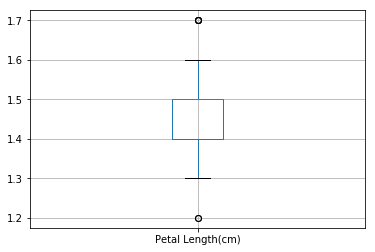

In [97]:
virginica_df = df[df['Class'] == "Iris-virginica"]
sepal_length_virginica = setosa_df[setosa_df['Petal Length(cm)'].notnull()]['Petal Length(cm)']
filterd_sepal_length_virginica = remove_outliers(sepal_length_virginica)
cl = calucurate_confidence_interval(filterd_sepal_length_virginica, 0.95)
pd.DataFrame(filterd_sepal_length_virginica).boxplot()